In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt_tab', download_dir=os.path.join(os.path.dirname(os.getcwd()), 'venv', 'nltk_data'))
nltk.download('stopwords', download_dir=os.path.join(os.path.dirname(os.getcwd()), 'venv', 'nltk_data'))
nltk.download('punkt', download_dir=os.path.join(os.path.dirname(os.getcwd()), 'venv', 'nltk_data'))
nltk.data.path = [os.path.join(os.path.dirname(os.getcwd()), 'venv', 'nltk_data')]
%matplotlib inline

[nltk_data] Downloading package punkt_tab to
[nltk_data]     c:\ML_week_SA_drugs\venv\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:\ML_week_SA_drugs\venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:\ML_week_SA_drugs\venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('../data/drug_review_train.csv')

In [3]:
### mapping ratings to sentiment categories
def map_rating_to_sentiment(rating):
    if 8 <= rating <= 10:
        return 'positive'
    elif 5 <= rating <= 7:
        return 'neutral'
    elif 1 <= rating <= 4:
        return 'negative'


df['sentiment'] = df['rating'].apply(map_rating_to_sentiment)

Word frequencies for positive sentiment:
recommend        5866
taking          22508
prescribed       7565
bottle            740
usually          2237
                ...  
theo                1
hypocalcemia        1
plummedted          1
ariceptfor          1
somnolent           1
Length: 33122, dtype: int64

Word frequencies for neutral sentiment:
experience    1330
somewhat       181
mixed          135
using         1332
implanon       419
              ... 
situated         1
psyched          1
tolerances       1
preferably       1
someplace        1
Length: 17240, dtype: int64

Word frequencies for negative sentiment:
used          2314
restasis        41
year          3141
seen           341
almost        2713
              ... 
noteable         1
acidophlus       1
combusted        1
cowgirl          1
factly           1
Length: 21295, dtype: int64



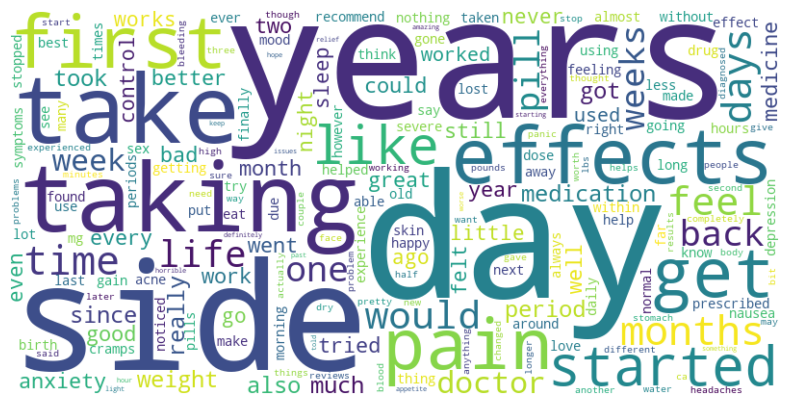

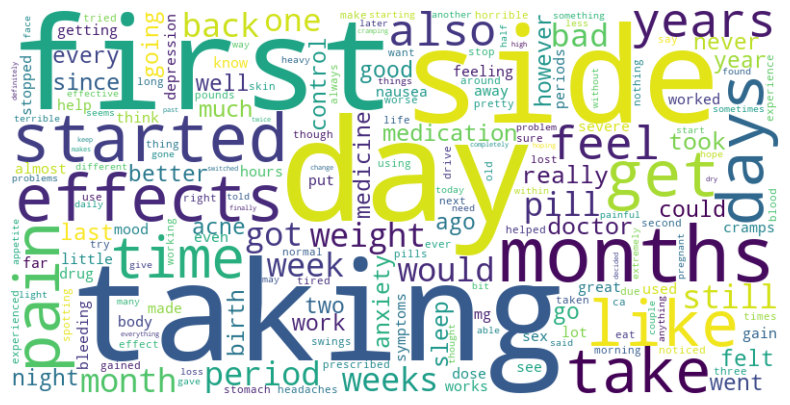

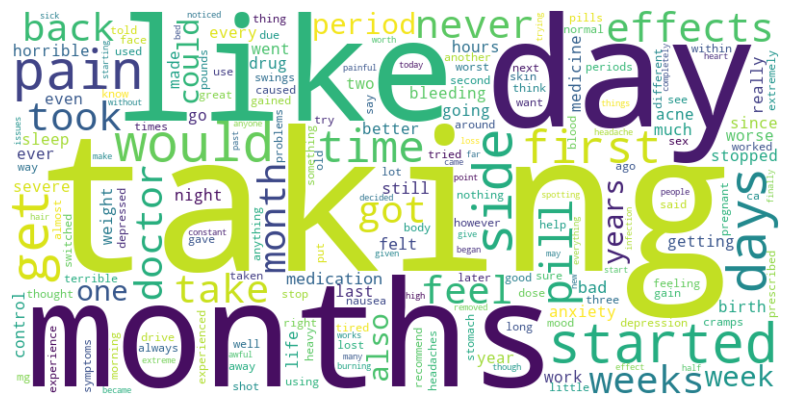

In [4]:
""" 
Most frequent words for each sentiment
"""
def process_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

def most_frequent_words(df, sentiment):
    filtered_df = df[df["sentiment"] == sentiment]
    text = " ".join(filtered_df['review'].dropna().str.strip())
    tokens = process_text(text)
    word_freq = Counter(tokens)
    return word_freq

sentiments = ['positive', 'neutral', 'negative']

word_frequencies = {sentiment: most_frequent_words(df, sentiment) for sentiment in sentiments}

word_freq_series = {sentiment: pd.Series(freq) for sentiment, freq in word_frequencies.items()}

for sentiment, series in word_freq_series.items():
    print(f"Word frequencies for {sentiment} sentiment:")
    print(series)
    print()

def generate_wordcloud_from_frequencies(word_freq):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for sentiment, freq in word_frequencies.items():
    generate_wordcloud_from_frequencies(freq)

In [71]:
df.groupby("sentiment")["review_length"].mean()

sentiment
negative    92.763237
neutral     97.052327
positive    96.178879
Name: review_length, dtype: float64